# ------------------------------------------NIET FDP PROGRAM--------------------------------------------

## Implementation of Quantum Circuits for Cryptanalysis of AES using Grover’s Algorithm
### Author: Sukhsagar Dubey 
###  Senior Research Engineer - LTIMINDTREE
# -----------------------------------------------------------------------------------------------------------

## 1. Algorithm Overview

Grover’s algorithm involves three key steps: state preparation, oracle application, and the diffusion operator.

*. State preparation initializes the system into a uniform superposition over all possible inputs—effectively creating the entire search space. In the earlier list example, this would correspond to all the items in the list.

*. The oracle is a quantum subroutine that identifies or "marks" the correct solution(s) by flipping the phase of the corresponding quantum state.

*. The diffusion operator then amplifies the probability amplitude of the marked state(s), increasing their likelihood of being measured when the algorithm is complete.

In [46]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, QuantumRegister ,ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
# Select the AerSimulator from the Aer provider
simulator = AerSimulator(method='matrix_product_state')

## 2. Grover Step by Step

### 2.1 Preparing the equal superposition of Search Space

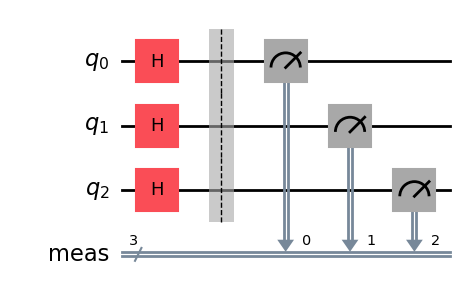

In [31]:
# Define the number of qubits (search space size = 2^n)
n_qubits = 3

# Create a quantum circuit
ckt = QuantumCircuit(n_qubits)

# Apply Hadamard gates to create a superposition
for i in range(n_qubits):
    ckt.h(i)
    
qc=ckt.copy()
ckt.measure_all()
ckt.draw('mpl')

{'101': 138, '111': 131, '001': 134, '011': 118, '110': 131, '100': 121, '010': 119, '000': 132}


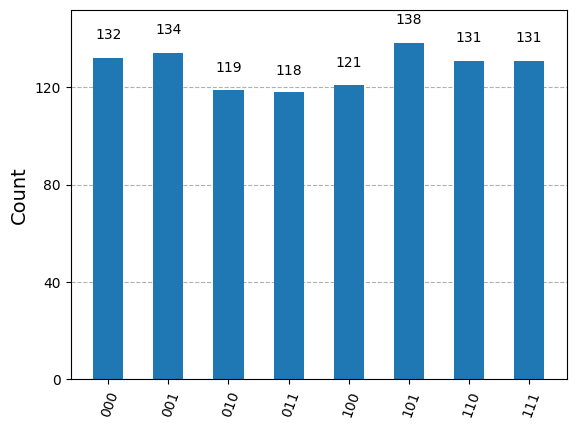

In [32]:
# Simulate the circuit
tcirc = transpile(ckt, simulator)
result = simulator.run(tcirc).result()
counts = result.get_counts(0)
# Visualize the result
print(counts)
plot_histogram(counts)

In [25]:
# Save the statevector
qc.save_statevector()

# Simulate the circuit
simulator = AerSimulator()
job = simulator.run(qc)
output_state = job.result().get_statevector()


# Print the statevector as a sum of computational basis states
basis_states = [format(i, '0' + str(n_qubits) + 'b') for i in range(2 ** n_qubits)]
superposition = ""
for i, coeff in enumerate(output_state):
    if np.isclose(coeff, 0):
        continue
    superposition += f"({coeff:.4f}) |{basis_states[i]}⟩ + "
superposition = superposition[:-3]  # Remove the extra " + "

print(superposition)

# Print the output state in ket notation
from qiskit.visualization import array_to_latex
array_to_latex(output_state, prefix="\\text{Output state: } |\\psi\\rangle = ")

(0.3536+0.0000j) |000⟩ + (0.3536+0.0000j) |001⟩ + (0.3536+0.0000j) |010⟩ + (0.3536+0.0000j) |011⟩ + (0.3536+0.0000j) |100⟩ + (0.3536+0.0000j) |101⟩ + (0.3536+0.0000j) |110⟩ + (0.3536+0.0000j) |111⟩


<IPython.core.display.Latex object>

###  2.2 Creating the Oracle

Oracle access to a black-box Boolean function $ f : \{0,1\}^n \rightarrow \{0,1\} $ .
$$ O_f |{x}\rangle = (-1)^{f(x)} |{x}\rangle $$

The oracle applies a phase shift to the target state, which can be viewed as a reflection of the initial state vector about the hyperplane orthogonal to the target state.

 $$  R_t=I-2 |t\rangle \langle t| $$
Reflection Operator,if $ |t\rangle=|110\rangle $ in three qubit system
\
$$
R_t=\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{pmatrix} $$


Circuit Construction of a Grover Oracle
If we have our classical function 
, we can convert it to a reversible circuit of the form:

A Classical Reversible Oracle


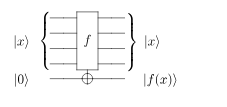

If we initialize the 'output' qubit in the state $|-\rangle$, the phase kickback effect turns this into a Grover oracle.

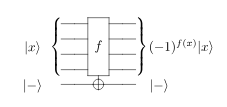


Let's consider the state $|-\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)$.

Applying the phase kickback, we get:

$U_f |x\rangle |-\rangle = \frac{1}{\sqrt{2}} (|x\rangle |0 \oplus f(x)\rangle - |x\rangle |1 \oplus f(x)\rangle)$

$= \frac{1}{\sqrt{2}} |x\rangle (|f(x)\rangle - |1 \oplus f(x)\rangle)$

$= (-1)^{f(x)} |x\rangle |-\rangle$

The phase kickback is evident in the term $(-1)^{f(x)}$, which applies a phase factor to the state $|x\rangle |-\rangle$.

Let consider $f(x_0, x_1) = ¬x_0 ∧ x_1 $

<div style="width: 200px; margin: auto;">
    
| $x_1$ | $x_0$ | $f$ |
| --- | --- | --------  |
| 0   | 0   | 0         |
| 0   | 1   | 0         |
| 1   | 0   | 1         |
| 1   | 1   | 0         |
</div>

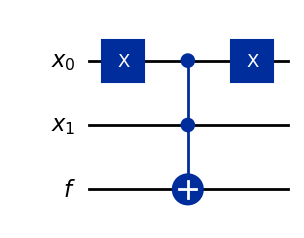

In [48]:
inp=QuantumRegister(2,name='x')#Input register
out=QuantumRegister(1,name='f')
qc=QuantumCircuit(inp, out)
qc.x(inp[0])
qc.mcx(inp,out)
qc.x(inp[0])
qc.draw('mpl')

In [49]:
inp=QuantumRegister(2,name='x')#Input register
out=QuantumRegister(1,name='f')
qc=QuantumCircuit(inp, out)
qc.h(inp)
qc.x(inp[0])
qc.mcx(inp,out)
qc.x(inp[0])

# Save the statevector
qc.save_statevector()

# Simulate the circuit
simulator = AerSimulator()
job = simulator.run(qc)
output_state = job.result().get_statevector()


# Print the statevector as a sum of computational basis states
basis_states = [format(i, '0' + str(n_qubits) + 'b') for i in range(2 ** n_qubits)]
superposition = ""
for i, coeff in enumerate(output_state):
    if np.isclose(coeff, 0):
        continue
    superposition += f"({coeff:.4f}) |{basis_states[i]}⟩ + "
superposition = superposition[:-3]  # Remove the extra " + "

print(superposition)

(0.5000+0.0000j) |000⟩ + (0.5000+0.0000j) |001⟩ + (0.5000+0.0000j) |011⟩ + (0.5000+0.0000j) |110⟩


###  2.3 Creating the Diffusion Operator

The diffusion operator can be represented as:
$D = 2|s⟩⟨s| - I $
where |s⟩ is the uniform superposition state and I is the identity operator.
When applied to a quantum state, the diffusion operator amplifies the amplitude of the target state(s) while suppressing the amplitude of non-target states, thereby increasing the probability of measuring the target state(s). This process is repeated iteratively to achieve the desired amplification.

$$ D=H^{\bigotimes{n}} (2|0.....0⟩⟨0....0| - I) H^{\bigotimes{n}} $$


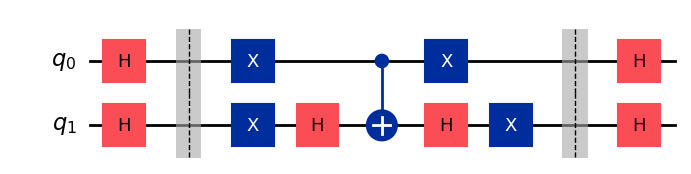

In [70]:

def diffusion_operator(num_qubits):
    qc = QuantumCircuit(num_qubits)
    
    # Apply Hadamard gates to all qubits
    qc.h(range(num_qubits))
    qc.barrier()
    
    # Apply X gates to all qubits
    qc.x(range(num_qubits))
    
    # Apply multi-controlled Z gate
    qc.h(num_qubits - 1)
    qc.mcx(list(range(num_qubits - 1)), num_qubits - 1)
    qc.h(num_qubits - 1)
    
    # Apply X gates to all qubits
    qc.x(range(num_qubits))
    
    # Apply Hadamard gates to all qubits
    qc.barrier()
    qc.h(range(num_qubits))

    return qc

num_qubits = 2
diffusion_qc = diffusion_operator(num_qubits)
diffusion_qc.draw('mpl')

## 3. Example 1

Finding one out of four in single query.

Let consider $f(x_0, x_1) = ¬x_0 ∧ x_1 $

for $n=2$
$$\left\lfloor \frac{\pi}{4} \sqrt{2^n} \right\rfloor=1$$

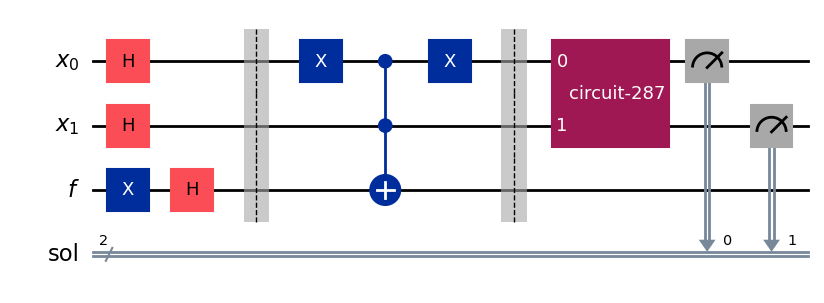

In [84]:
inp=QuantumRegister(2,name='x')  #Input register
out=QuantumRegister(1,name='f')  # Ancilla
cl_register=ClassicalRegister(2,name='sol')
qc_ex1=QuantumCircuit(inp, out,cl_register)
#1. State preparation 
qc_ex1.h(inp)
qc_ex1.x(out)
qc_ex1.h(out)
qc_ex1.barrier()

# Apply Oracle
qc_ex1.x(inp[0])
qc_ex1.mcx(inp,out)
qc_ex1.x(inp[0])
qc_ex1.barrier()

# Apply Diffusion operator 
diff_op=diffusion_operator(2)
#DO=diff_op.to_gate(label='Diff_OP') 
qc_ex1.append(diff_op,inp[:])

#perform measurement
qc_ex1.measure(inp,cl_register)
qc_ex1.decompose(reps=0).draw('mpl')

{'10': 1024}


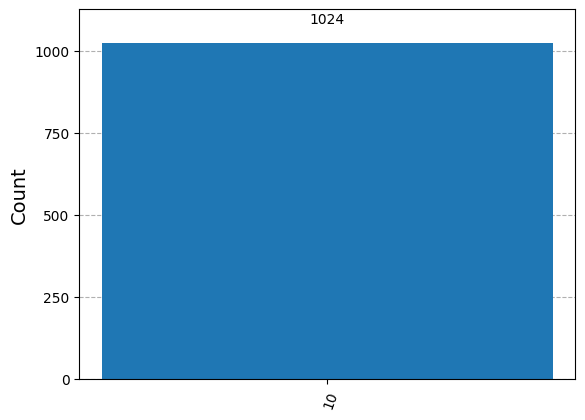

In [85]:
# Simulate the circuit
tcirc_ex1 = transpile(qc_ex1, simulator)
result = simulator.run(tcirc_ex1).result()
counts = result.get_counts()
# Visualize the result
print(counts)
plot_histogram(counts)

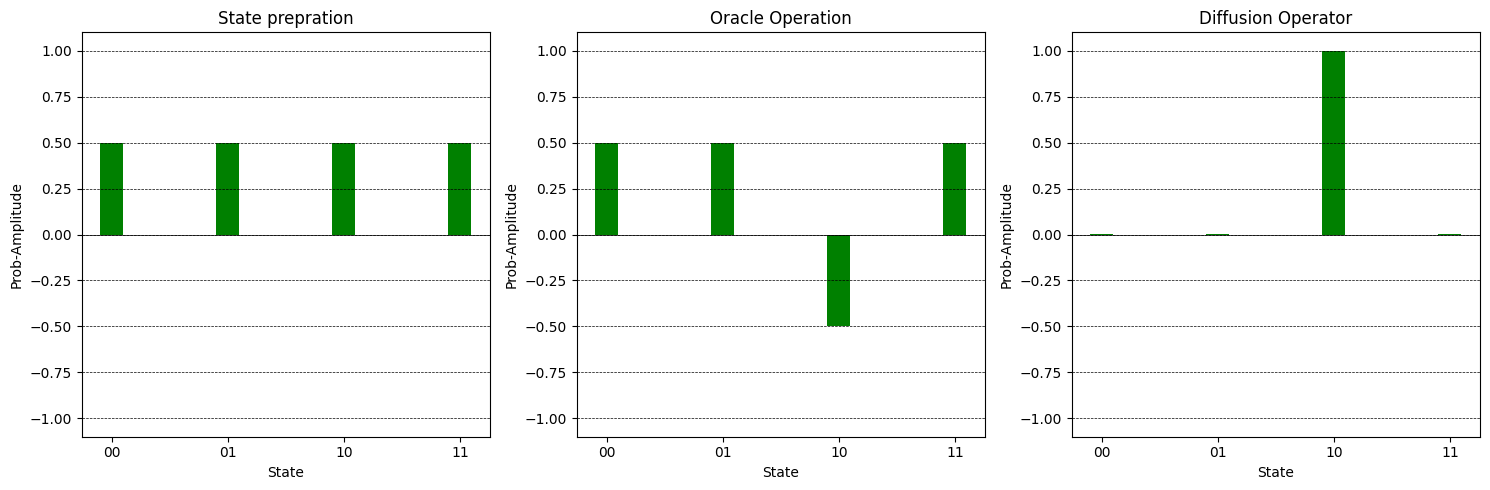

In [88]:
import matplotlib.pyplot as plt

res1 = {'00': 0.5, '01': 0.50, '10': 0.50, '11': 0.50}
res2 = {'00': 0.5, '01': 0.50, '10': -0.50, '11': 0.50}
res3 = {'00': 0.002, '01': 0.002, '10': 1.0, '11': 0.002}

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
Title=['State prepration','Oracle Operation','Diffusion Operator']
for i, (res, ax) in enumerate(zip([res1, res2, res3], axs)):
    ax.bar(res.keys(), res.values(), width=0.20, color='g')
    ax.grid(color='black', axis='y', linestyle='--', linewidth=0.5)
    ax.set_ylabel("Prob-Amplitude")
    ax.set_xlabel("State")
    ax.set_ylim(-1.1, 1.1)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    ax.set_title(f"{Title[i]}")

plt.tight_layout()
plt.show()

## 4. Example 2 (Multiple solutions)

Let consider $f= (x_0 ∧ x_1 ∧ ¬x_2) ⊕ (x_0 ∧ x_1 ∧ x_2)$


| x_2 | x_1 | x_0 | f
| --- | --- | --- | --- |
| 0   | 0   | 0   | 0                |
| 0   | 0   | 1   | 0                |
| 0   | 1   | 0   | 0                |
| 0   | 1   | 1   | 1                |
| 1   | 0   | 0   | 0                |
| 1   | 0   | 1   | 0                |
| 1   | 1   | 0   | 0                |
| 1   | 1   | 1   | 1                |

If the number of solutions $M ≤ N/2$ is known, then running 
$O
(
√
N
/
M
)$
 iterations will yield a solution with high probability.

for n=3, $N=2^n=8$ & $M=2$
 $$\left\lfloor \frac{\pi}{4} \sqrt{N/M} \right\rfloor=1$$

In [106]:
# Oracle design 
inp=QuantumRegister(3,name='x')  #Input register
out=QuantumRegister(1,name='f')  # Ancilla
cl_register=ClassicalRegister(2,name='sol')
qc_ex2=QuantumCircuit(inp, out,cl_register)

#(x_0 ∧ x_1 ∧ ¬x_2)
qc_ex2.x(inp[2])  
qc_ex2.mcx(inp[:], out[:])  
qc_ex2.x(inp[2]) 

#(x_0 ∧ x_1 ∧ x_2)
qc_ex2.mcx(inp[:], out[:])  

print(qc_ex2.draw())

                           
  x_0: ───────■─────────■──
              │         │  
  x_1: ───────■─────────■──
       ┌───┐  │  ┌───┐  │  
  x_2: ┤ X ├──■──┤ X ├──■──
       └───┘┌─┴─┐└───┘┌─┴─┐
    f: ─────┤ X ├─────┤ X ├
            └───┘     └───┘
sol: 2/════════════════════
                           


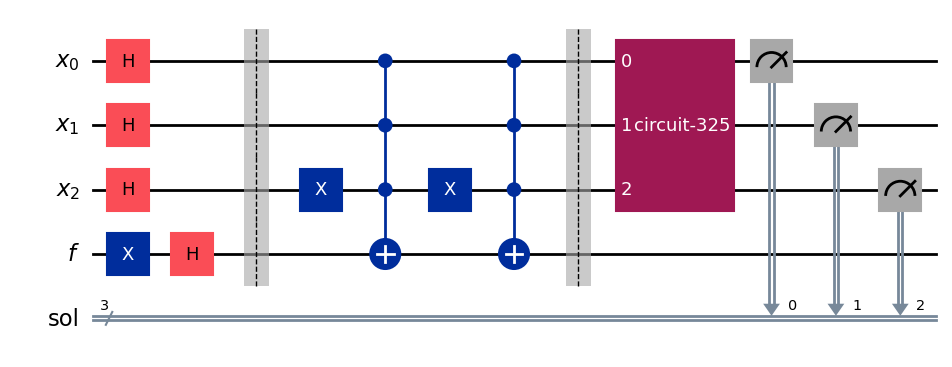

In [107]:
inp=QuantumRegister(3,name='x')  #Input register
out=QuantumRegister(1,name='f')  # Ancilla
cl_register=ClassicalRegister(3,name='sol')
qc_ex2=QuantumCircuit(inp, out,cl_register)
#1. State preparation 
qc_ex2.h(inp)
qc_ex2.x(out)
qc_ex2.h(out)
qc_ex2.barrier()

# Apply Oracle
qc_ex2.x(inp[2])  
qc_ex2.mcx(inp[:], out[:])  
qc_ex2.x(inp[2]) 
qc_ex2.mcx(inp[:], out[:]) 
qc_ex2.barrier()

# Apply Diffusion operator 
diff_op=diffusion_operator(len(inp))
#DO=diff_op.to_gate(label='Diff_OP') 
qc_ex2.append(diff_op,inp[:])

#perform measurement
qc_ex2.measure(inp,cl_register)
qc_ex2.decompose(reps=0).draw('mpl')

{'011': 545, '111': 479}


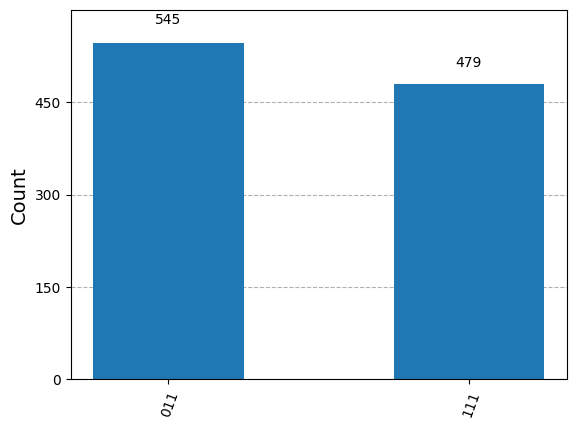

In [108]:
# Simulate the circuit
tcirc_ex2 = transpile(qc_ex2, simulator)
result = simulator.run(tcirc_ex2).result()
counts = result.get_counts()
# Visualize the result
print(counts)
plot_histogram(counts)

## 5. Example 3 (Grover attack on Simplified AES)

Refer <u>https://github.com/dubey-sukhsagar/Implementation-of-Quantum-Circuits-for-Cryptanalysis/tree/main </u>

In [43]:
import qiskit
import qiskit_aer
print('qiskit.__version__:',qiskit.__version__)
print('qiskit_aer.__version__:',qiskit_aer.__version__)

qiskit.__version__: 1.1.1
qiskit_aer.__version__: 0.17.1
